# ME 696 Homework 3

## Particle Filter on a Linear-Gaussian System 

In this exercise,  you are asked to design a particle filter for a simple dynamical system: a car with linear dynamics moving in a linear environment.  Assume $\Delta t=1$ for simplicity.  The position of the car at time $t$ is given by $x$.  Its velocity is $\dot{x}_t$, and its acceleration is $\ddot{x}_t$.  Suppose the acceleration is set randomly at each point in time, according to a Gaussian with zero mean and covariance $\sigma^2=1$.

(a)  What is a minimal state vector for the particle filter such that the resulting system is Markovian? 

(b)  For your state vector, design the state transition probability $p(x_t|u_t,x_{t−1})$. *Hint:  This transition function will possess linear matrices $A$ and $B$ and a noise covariance $R$*.

(c) Implement the state prediction step of the particle filter in your programming language of choice.
Assuming we know at time $t = 0$, $x_0 = \dot{x}_0 = \ddot{x}_0 = 0$. Plot the state distributions for times
$t = 1,2,\dots,5$.

(d) For each value of $t$, plot the joint posterior over $x$ and $\dot{x}$ where $x$ is the horizontal axis and $\dot{x}$ is the vertical axis. For each posterior, you are asked to plot an uncertainty ellipse, which is the
ellipse of points that are one standard deviation away from the mean.

(e) What will happen to the correlation between $x_t$ and $\dot{x}_t$ as $t\rightarrow \infty$.

We will now add measurements to our particle filter. Suppose at time $t$, we can receive a noisy
observation of $x$. In expectation, our sensor measures the true location. However, this measurement is
corrupted by Gaussian noise with covariance $\sigma^2 = 10$.

(f) Define the measurement model. *Hint: You need to define a matrix $C$ and another matrix $Q$*.

(g) Implement the measurement update. Suppose at time $t = 5$, we observe a measurement $z =
5$. State the parameters of the Gaussian approximation of the particle distribution before and
after updating the particle filter. Plot the uncertainty ellipse before and after incorporating the
measurement.

---

### (a)  What is a minimal state vector for the particle filter such that the resulting system is Markovian? 

In order for the system to be Markovian, the current state should only depend on its previous state(s). Since the car has linear dynamics moving in a linear environment, we can write the dynamics as follows: 
<center>
$
    \begin{equation}
        x_{t} = x_{t-1} + \dot{x}_t \Delta t + \frac{1}{2} \ddot{x} (\Delta t)^2
    \end{equation}
$
</center> 

<center>
$
    \begin{equation}
        \dot{x}_t = \dot{x}_{t-1} + \ddot{x} \Delta t
    \end{equation}
$
</center>
The acceleration of the car essentially controls the other state variables (velocity and position). Therefore, the acceleration term is the control and the minimum state vector is: 
<center>
    \begin{equation}
        \mathbf{x}_t = \begin{bmatrix} x_{t} \\ \dot{x}_{t} \end{bmatrix}
    \end{equation}
</center>

---

### (b)  For your state vector, design the state transition probability $p(x_t|u_t,x_{t−1})$. *Hint:  This transition function will possess linear matrices $A$ and $B$ and a noise covariance $R$*.

The state transition function has the form $\mathbf{x}_t = A\mathbf{x}_{t-1} + B\mathbf{u}_{t} + w_{t}$ where, 

<center>
    $A \triangleq \begin{bmatrix} 1 & \Delta t \\ 0 & 1 \end{bmatrix}$, <br> <br>
    $B \triangleq \begin{bmatrix} \frac{1}{2} (\Delta t)^2 \\ \Delta t \end{bmatrix}$, <br> <br>
    $\mathbf{x}_t \triangleq \begin{bmatrix} x_t \\ \dot{x}_t \end{bmatrix}$, and<br> <br>
    $\mathbf{u}_t \triangleq \ddot{x}_t$ <br> <br>
</center>

Since $\Delta t = 1$, 
<center>
    $A = \begin{bmatrix} 1 & 1 \\ 0 & 1 \end{bmatrix}$, <br> <br>
    $B = \begin{bmatrix} \frac{1}{2} \\ 1 \end{bmatrix}$
</center>

The system error noise is a function of the acceleration term since the acceleration is modeled by a zero-mean Gaussian with covariance $\sigma^2$. An example of what could cause something like this is an accelerometer measuring zero acceleration on average, but it measures some acceleration due to noise. Therefore, $\ddot{x}_t=w_{t} \sim \mathcal{N}(0, \sigma^2)$ represents the control input of the robot. With the definitions defined above, the state transition function is: <br> 

<center>
    $
    \mathbf{x}_t = \begin{bmatrix} 1 & 1 \\ 0 & 1 \end{bmatrix}\mathbf{x}_{t-1} + 
    \begin{bmatrix} \frac{1}{2} \\ 1 \end{bmatrix}w_{t}
    $
</center> 

Because $w_{t}$ is modeled as a Gaussian in this state transition function, $p(\mathbf{x}_t|\mathbf{u}_t, \mathbf{x}_{t-1})$ is also a Gaussian. The probability tranistion function can be found by finding the expectance and covariance of the state transition function. The expectation is: <br> <br>

<center>
    $
        E[\mathbf{x}_t] = E[A\mathbf{x}_{t-1}] + E[B\mathbf{w}_{t}] = A\mathbf{x}_{t-1}
    $
</center> <br> 

The covariance of the state transition function is: 

<center>
    $Cov[\mathbf{x}_t, \mathbf{x}_t] = E[(\mathbf{x}_t)(\mathbf{x}_t)^T] + E[\mathbf{x}_t]E[\mathbf{x}_t^T]$ <br> <br>
    $Cov[\mathbf{x}_t, \mathbf{x}_t] = E[(\mathbf{x}_t)(\mathbf{x}_t)^T] + A\mathbf{x}_t\mathbf{x}_t^TA^T$ <br> <br> 
    $Cov[\mathbf{x}_t, \mathbf{x}_t] = E[(A\mathbf{x}_{t} + B\mathbf{w}_{t})(A\mathbf{x}_{t}+
    B\mathbf{w}_{t})^T] + A\mathbf{x}_t\mathbf{x}_t^TA^T$ <br> <br> 
    $Cov[\mathbf{x}_t, \mathbf{x}_t] = E[A\mathbf{x}_{t}(A\mathbf{x}_{t})^T] + 
                                       E[A\mathbf{x}_{t}(B\mathbf{w}_{t})^T] + 
                                       E[B\mathbf{w}_{t}(A\mathbf{x}_{t})^T] +
                                       E[B\mathbf{w}_{t}(B\mathbf{w}_{t})^T] +
                                       A\mathbf{x}_t\mathbf{x}_t^TA^T
    $
</center> <br>

The noise covariance term should be time invariant as it is noise from the control sensor (i.e. accelerometer). Therefore, we can use the intial conditions ($x=\dot{x}=\ddot{x}=0$) to simplify the terms and get: 
<center>
    $
    Cov[\mathbf{x}_t, \mathbf{x}_t] = 
        E[w_{t}w_{t}^T] = (\begin{bmatrix} \frac{1}{2} \\ 1 \end{bmatrix}\sigma^2)([\frac{1}{2} \ 1] \sigma^2)
                        = \underbrace{\begin{bmatrix} 1/4. & 1/2. \\ 1/2. & 1 \end{bmatrix}}_R
    $
</center> <br>

With the expectation and covariance terms, the probability transition function can be found as: <br> <br>

<center>
    $p(\mathbf{x}_{t}|u_{t},\mathbf{x}_{t-1}) \sim \mathcal{N}(A\mathbf{x}_{t-1}, R)$
</center>

---

### (c) Implement the state prediction step of the particle filter in your programming language of choice. Assuming we know at time $t = 0$, $x_0 = \dot{x}_0 = \ddot{x}_0 = 0$. Plot the state distributions for times $t = 1,2,\dots,5$.


To sample $M$ number of particles from the probability transition function, the acceleration is randomly generated based on a zero-mean Gaussian with covariance $R$. 

In [2]:
# Import libraries
import numpy as np
import matplotlib as mpl 
import matplotlib.pyplot as plt

In [69]:
# Functions
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.
    
    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.
        
    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into. 
        
    n_std : float
        The number of standard deviations to determine the ellipse's raiuses.
        
    **kwargs
        Forwarded to `-matplotlib.patches.Ellipse`
    
    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")
        
    cov = np.cov(x,y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                          facecolor=facecolor, **kwargs)
    
    # Calculating the standard deviation of x from 
    # the squareroot of the variance and multiplying 
    # with the given number of standard deviations. 
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)
    
    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)
    
    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)
    
    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

def multivariate_gaussian(S, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos."""
    
    n = mu.shape[0]
    Sigma_det=np.linalg.det(Sigma)
    Sigma_inv=np.linalg.inv(Sigma)
    N=np.sqrt((2*np.pi)**n*Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac=np.einsum('...k,kl,...l->...',S-mu,Sigma_inv,S-mu)
    
    return np.exp(-fac/2)/N

def low_variance_sampler(particleSet, weights):
    M = len(weights)
    newParticles = particleSet*0
    r = np.random.uniform(0, 1/M)
    c = weights[0]
    i = 0
    for m in range(M):
        U = r + (m-1)*(1/M)
        while U > c:
            i = i + 1
            c = c + weights[i]
        newParticles[0][m] = particleSet[0][i]
        newParticles[1][m] = particleSet[1][i]
    return newParticles

Text(0, 0.5, 'Velocity')

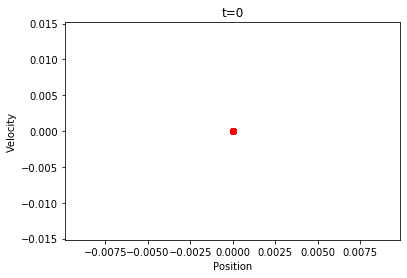

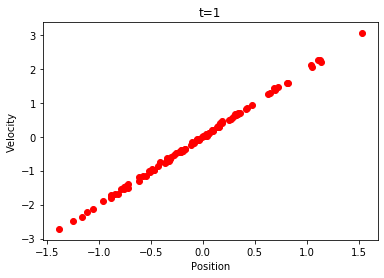

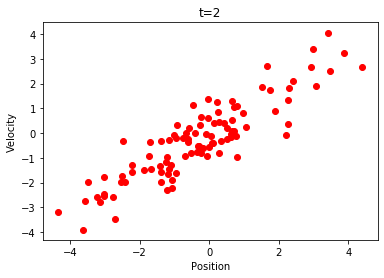

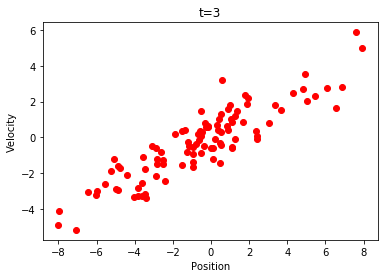

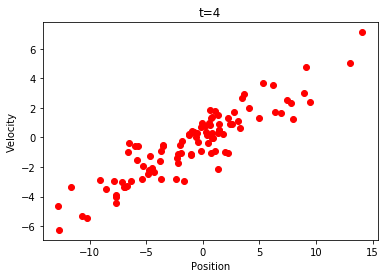

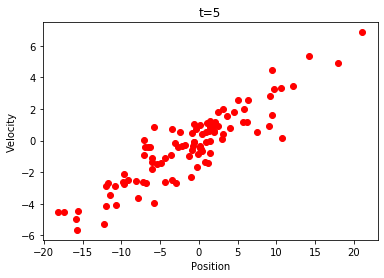

In [4]:
mu = np.array([0,0])                   # mu
A = np.array([[1., 1.],                # noise matrix
             [0., 1.]])
R = np.array([[1/4., 1/2.],            # noise covariance matrix
              [1/2., 1.001]]) 
M = 100                                # number of samples
t = np.linspace(1, 5, 5)               # time t
particles = np.zeros((len(t)+1, 2, M)) # create a t x 2 x M numpy array to store particles

for t in t:
    """
    For every time t, generate M number of particles for the state vector x using the probability
    transition function from problem (a). 
    """
    t = int(t)
    particles[t][0], particles[t][1] = np.dot(A, particles[t-1]) + np.random.multivariate_normal(mu,R,M).T
    
fig1 = plt.figure()
ax1 = fig1.add_subplot()
ax1.scatter(particles[0][0], particles[0][1], color='r')
ax1.set_title("t=0")
ax1.set_xlabel('Position')
ax1.set_ylabel('Velocity')

fig2 = plt.figure()
ax2 = fig2.add_subplot()
ax2.scatter(particles[1][0], particles[1][1], color='r')
ax2.set_title("t=1")
ax2.set_xlabel('Position')
ax2.set_ylabel('Velocity')

fig3 = plt.figure()
ax3 = fig3.add_subplot()
ax3.scatter(particles[2][0], particles[2][1], color='r')
ax3.set_title("t=2")
ax3.set_xlabel('Position')
ax3.set_ylabel('Velocity')

fig4 = plt.figure()
ax4 = fig4.add_subplot()
ax4.scatter(particles[3][0], particles[3][1], color='r')
ax4.set_title("t=3")
ax4.set_xlabel('Position')
ax4.set_ylabel('Velocity')

fig5 = plt.figure()
ax5 = fig5.add_subplot()
ax5.scatter(particles[4][0], particles[4][1], color='r')
ax5.set_title("t=4")
ax5.set_xlabel('Position')
ax5.set_ylabel('Velocity')

fig6 = plt.figure()
ax6 = fig6.add_subplot()
ax6.scatter(particles[5][0], particles[5][1], color='r')
ax6.set_title("t=5")
ax6.set_xlabel('Position')
ax6.set_ylabel('Velocity')

### (d) For each value of $t$, plot the joint posterior over $x$ and $\dot{x}$ where $x$ is the horizontal axis and $\dot{x}$ is the vertical axis. For each posterior, you are asked to plot an uncertainty ellipse, which is the ellipse of points that are one standard deviation away from the mean.

<ipython-input-3-ed456d6f54c4>:31: RuntimeWarning: invalid value encountered in double_scalars
  pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])


Text(0, 0.5, 'Velocity')

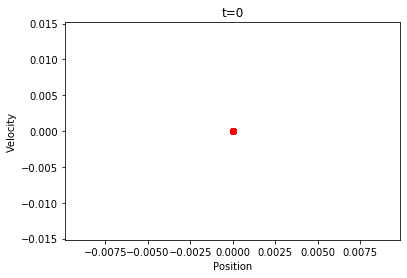

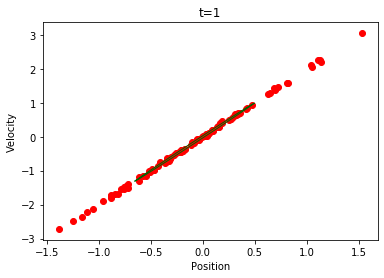

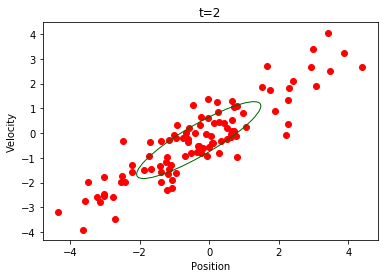

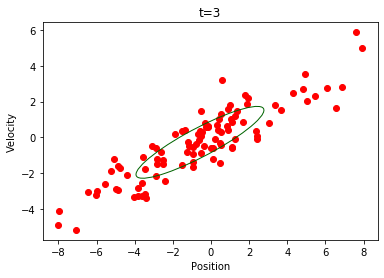

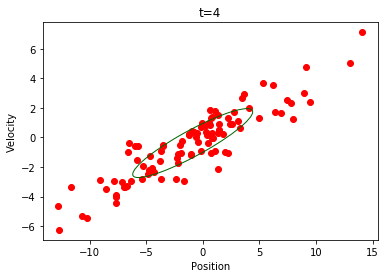

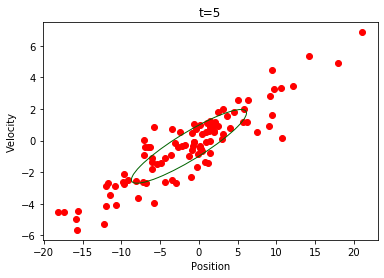

In [5]:
fig1 = plt.figure()
ax1 = fig1.add_subplot()
ax1.scatter(particles[0][0], particles[0][1], color='r')
confidence_ellipse(particles[0][0], particles[0][1], ax1, n_std=1.0,label=r'$1-\sigma$',edgecolor='darkgreen')
ax1.set_title("t=0")
ax1.set_xlabel('Position')
ax1.set_ylabel('Velocity')

fig2 = plt.figure()
ax2 = fig2.add_subplot()
ax2.scatter(particles[1][0], particles[1][1], color='r')
confidence_ellipse(particles[1][0], particles[1][1], ax2, n_std=1.0,label=r'$1-\sigma$',edgecolor='darkgreen')
ax2.set_title("t=1")
ax2.set_xlabel('Position')
ax2.set_ylabel('Velocity')

fig3 = plt.figure()
ax3 = fig3.add_subplot()
ax3.scatter(particles[2][0], particles[2][1], color='r')
confidence_ellipse(particles[2][0], particles[2][1], ax3, n_std=1.0,label=r'$1-\sigma$',edgecolor='darkgreen')
ax3.set_title("t=2")
ax3.set_xlabel('Position')
ax3.set_ylabel('Velocity')

fig4 = plt.figure()
ax4 = fig4.add_subplot()
ax4.scatter(particles[3][0], particles[3][1], color='r')
confidence_ellipse(particles[3][0], particles[3][1], ax4, n_std=1.0,label=r'$1-\sigma$',edgecolor='darkgreen')
ax4.set_title("t=3")
ax4.set_xlabel('Position')
ax4.set_ylabel('Velocity')

fig5 = plt.figure()
ax5 = fig5.add_subplot()
ax5.scatter(particles[4][0], particles[4][1], color='r')
confidence_ellipse(particles[4][0], particles[4][1], ax5, n_std=1.0,label=r'$1-\sigma$',edgecolor='darkgreen')
ax5.set_title("t=4")
ax5.set_xlabel('Position')
ax5.set_ylabel('Velocity')

fig6 = plt.figure()
ax6 = fig6.add_subplot()
ax6.scatter(particles[5][0], particles[5][1], color='r')
confidence_ellipse(particles[5][0], particles[5][1], ax6, n_std=1.0,label=r'$1-\sigma$',edgecolor='darkgreen')
ax6.set_title("t=5")
ax6.set_xlabel('Position')
ax6.set_ylabel('Velocity')

### (e) What will happen to the correlation between $x_{t}$ and $\dot{x}_t$ as $t\rightarrow\infty$?

From the figures created in problems (c) and (d), the correlation between $x_t$ and $\dot{x}_t$ would approach 1 as $t$ approaches infinity. 

### We will now add measurements to our particle filter. Suppose at time $𝑡$, we can receive a noisy observation of $x$. In expectation, our sensor measures the true location. However, this measurement is corrupted by Gaussian noise with covariance $\sigma^2=10$. 


### (f) Define the measurement model. Hint: You need to define a matrix $C$ and another matrix $𝑄$.

The measurement function has the form $\mathbf{z}_t = C\mathbf{x}_{t} + v_{t}$. Since the sensor is expected to measure the true location, the observation matrix $C$ is a scalar value of $1$ and the state vector $\mathbf{x}_t$ is just the position of the robot at time $t$. The noise $v_{t}$ can be modeled as a zero-mean Gaussian with a variance ($\sigma^2$). <br> <br>

<center>
    $C = 1$, <br> <br>
    $p(v_{t}) \sim \mathcal{N}(0, \sigma^2)$ <br> 
</center>

The observation model $p(z_t|x_t)$ can be modeled as a Gaussian. <br> <br>

<center>
    $p(z_t|x_t) \sim \mathcal{N}(Cx_{t}, \sigma^2)$ <br> 
</center>

### (g) Implement the measurement update. Suppose at time $t = 5$, we observe a measurement $z =5$. State the parameters of the Gaussian approximation of the particle distribution before and after updating the particle filter. Plot the uncertainty ellipse before and after incorporating the measurement.

The steps of the Particle Filter are as follows: 

1. Randomly generate a bunch of particles.
2. Generate a weight vector of size M particles that uniformly distributes particles. 
3. Predict the next state of particles using the probability transition function $p(\mathbf{x}_t | \mathbf{x}_{t-1}, \mathbf{u}_t)$. 
4. Update the weights based off the measurements. $z=0$ is the initial measurement and will be used as the measurement until the sensor reads another update at $t=5$. 
5. Resample the particles using a resampling scheme. The goal for this step is to replace particles with low weights (i.e. low probability) with highly probable particles. 


Text(0, 0.5, 'Velocity')

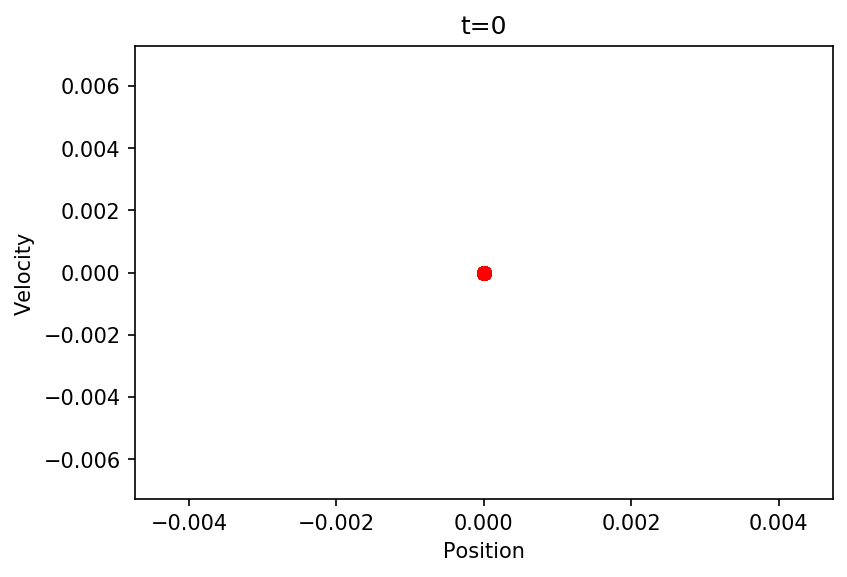

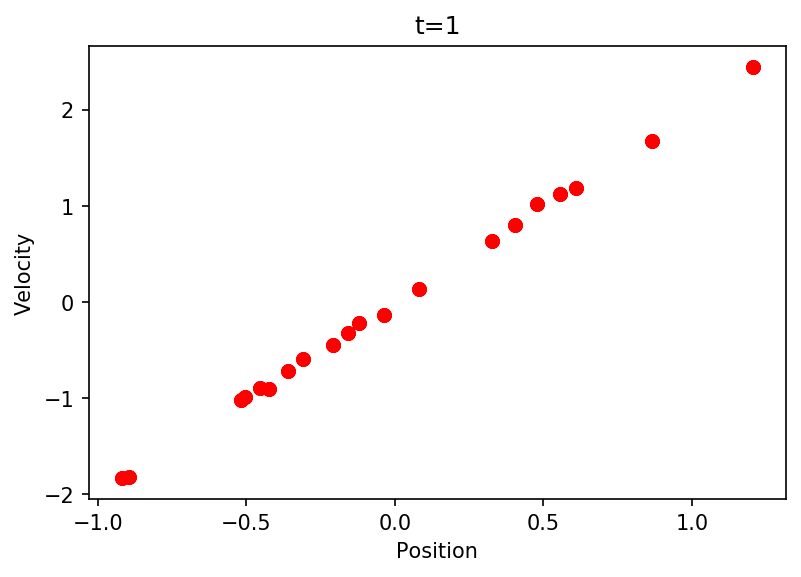

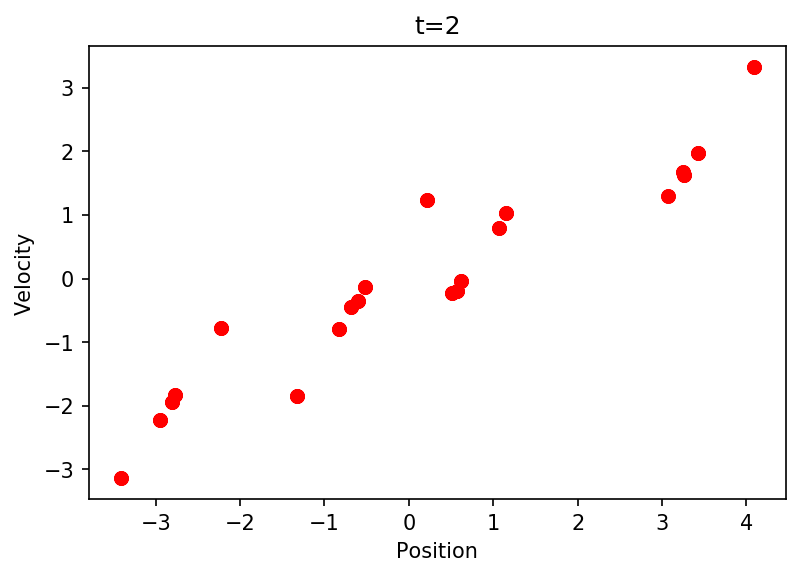

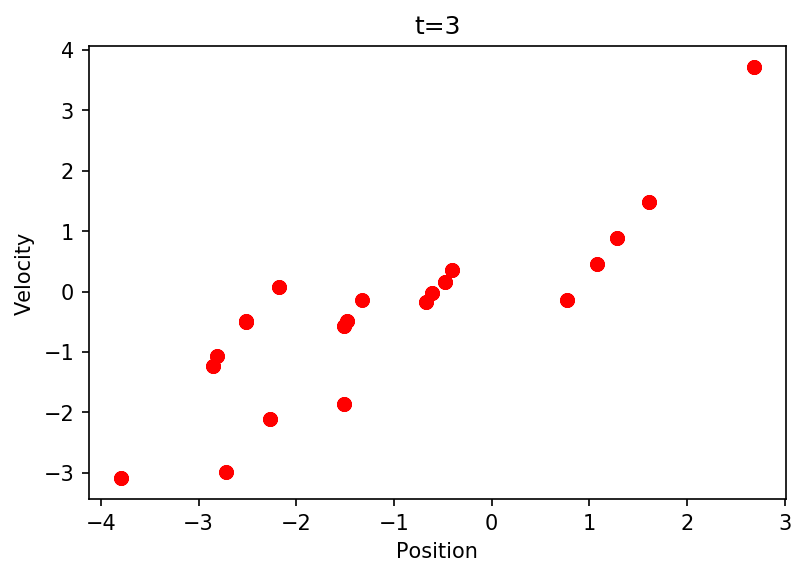

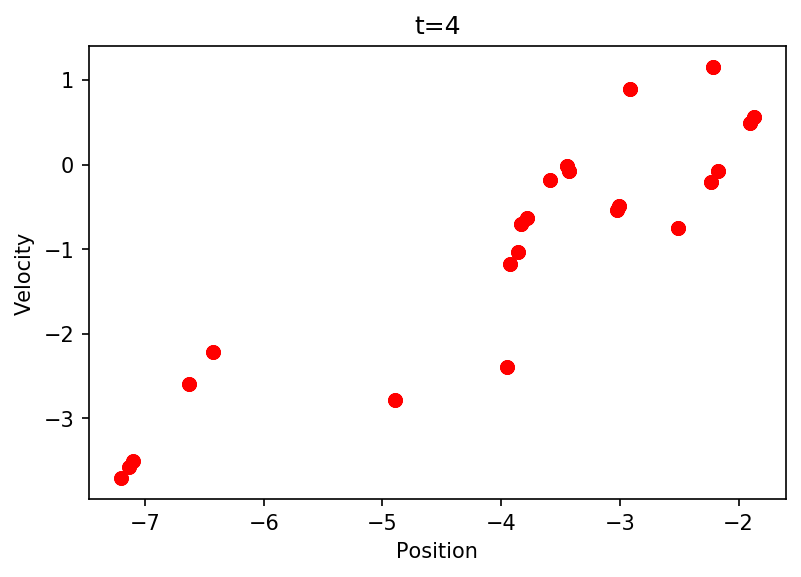

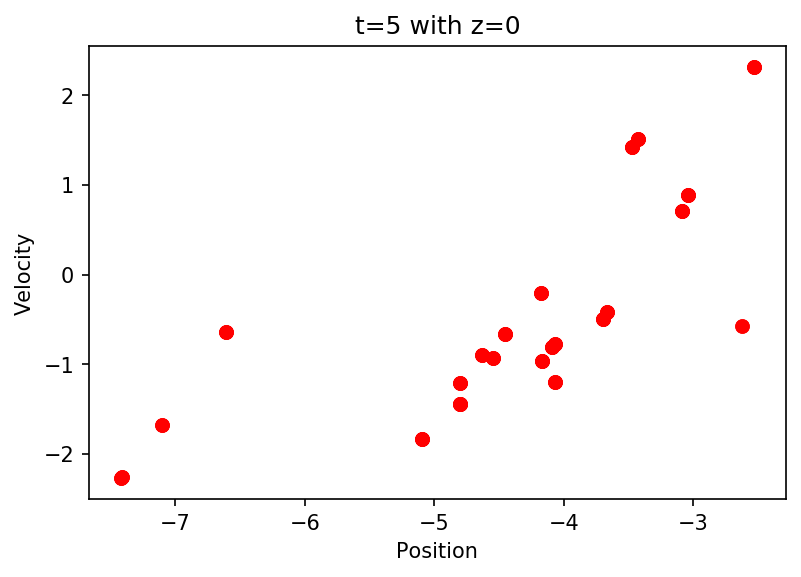

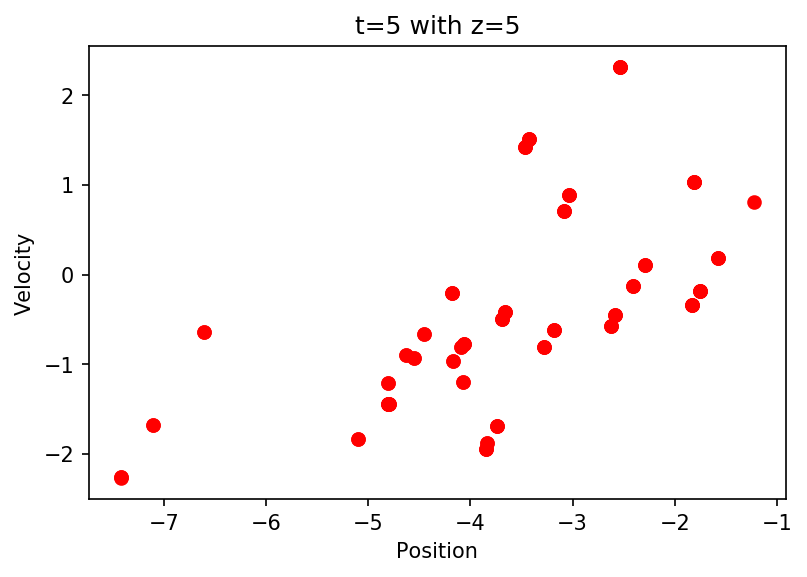

In [171]:
mu = np.array([0,0])                   # mu
A = np.array([[1., 1.],                # system matrix
             [0., 1.]])
R = np.array([[1/4., 1/2.],            # system noise covariance matrix
              [1/2., 1.001]])
C = 1                                  # observation matrix
Q = 10^2                               # observation noise matrix 
M = 100                                # number of samples
t = np.linspace(1, 5, 5)               # time t
particles = np.zeros((len(t)+1, 2, M)) # create a t x 2 x M numpy array to store particles
w = np.zeros((len(t)+1,M))             # create a t x 2 x M weight vector
w[0] = w[0]*(1/M)                      # all particles initially have equal weight
z = 0                                  # initial sensor measurement

# Weights, measurement, and particles at time t=5
w5 = w[0]
z5 = 5
p5 = particles[0]

for t in t:
    """
    For every time t, generate M number of particles for the state vector x using the probability
    transition function from problem (a). 
    """
    t = int(t)
    
    # Predict the next state
    particles[t][0], particles[t][1] = np.dot(A, particles[t-1]) + np.random.multivariate_normal(mu,R,M).T
    
    # Calculate the weight of the particles
    for m in range(M):
        w[t][m] = 1/(np.sqrt(2 * np.pi * Q**2))*np.exp(-(particles[t][0][m] - z)**2 / (2 * Q**2))
    
    if(t==5):
        for m in range(M):
            w5[m] = 1/(np.sqrt(2 * np.pi * Q**2))*np.exp(-(particles[t][0][m] - z5)**2 / (2 * Q**2))
        p5 = low_variance_sampler(particles[t], w5)
            
    # Low variance resampling
    particles[t] = low_variance_sampler(particles[t], w[t])


fig1 = plt.figure()
ax1 = fig1.add_subplot()
ax1.scatter(particles[0][0], particles[0][1], color='r')
ax1.set_title("t=0")
ax1.set_xlabel('Position')
ax1.set_ylabel('Velocity')

fig2 = plt.figure()
ax2 = fig2.add_subplot()
ax2.scatter(particles[1][0], particles[1][1], color='r')
ax2.set_title("t=1")
ax2.set_xlabel('Position')
ax2.set_ylabel('Velocity')

fig3 = plt.figure()
ax3 = fig3.add_subplot()
ax3.scatter(particles[2][0], particles[2][1], color='r')
ax3.set_title("t=2")
ax3.set_xlabel('Position')
ax3.set_ylabel('Velocity')

fig4 = plt.figure()
ax4 = fig4.add_subplot()
ax4.scatter(particles[3][0], particles[3][1], color='r')
ax4.set_title("t=3")
ax4.set_xlabel('Position')
ax4.set_ylabel('Velocity')

fig5 = plt.figure()
ax5 = fig5.add_subplot()
ax5.scatter(particles[4][0], particles[4][1], color='r')
ax5.set_title("t=4")
ax5.set_xlabel('Position')
ax5.set_ylabel('Velocity')

fig6 = plt.figure()
ax6 = fig6.add_subplot()
ax6.scatter(particles[5][0], particles[5][1], color='r')
ax6.set_title("t=5 with z=0")
ax6.set_xlabel('Position')
ax6.set_ylabel('Velocity')

fig7 = plt.figure()
ax7 = fig7.add_subplot()
ax7.scatter(p5[0], p5[1], color='r')
ax7.set_title("t=5 with z=5")
ax7.set_xlabel('Position')
ax7.set_ylabel('Velocity')

---
## Particle Filter on a Nonlinear-Gaussian System
Let's revisit Problem 2 of Homework 2 and solve it with a particle filter. There, we studied a mobile robot operating in a planar environment. Its state is its x-y-location and its global heading direction $\theta$. This nonlinear system is defined over three state variables and with deterministic state transition: <br> <br>

<center>
    $
     \begin{pmatrix} x' \\ y' \\ \theta'\end{pmatrix} =
     \begin{pmatrix} x+cos\theta \\ y+sin\theta \\ \theta \end{pmatrix} 
    $
</center>

The initial state estimate was as follows: <br> <br>

<center>
    $\mu = (0\ 0\ 0)$ and $\Sigma = \begin{pmatrix} 0.01 & 0 & 0 \\ 0 & 0.01 & 0 \\ 0 & 0 & 10000 \end{pmatrix} $
</center>

(a) Propose a suitable initial estimate (prior) for a particle filter (with 100 particles), which reflects the state of knowledge in the Gaussian prior. Plot the initial estimate. Hint: For this one, you will be plotting a 3D particle cloud with z-axis representing the heading in degrees with range $[-180^o, 180^o]$.

(b) After the robot moves $d=1$ units *forward*, assuming the robot moves flawlessly without any noise, implement the prediction step of the particle filter. Plot the posterior. compare the resulting posterior with the one you have obtained from the EKF and from your intuitive analysis. What can you learn about the resolution of the x-y coordinates and the orientation $\theta$ in your particle filter? Draw the uncertainty ellipse of the Gaussian approximation of your location posterior. How does it compare against the EKF estimate?

(c) Now incoprorate a measurement. Our measurement shall be a noisy projection of the x-coordinate of the robot, with covariance $Q=0.01$. As before, specify the measurement model. Implement the correction step of the particle filter, plot the posterior, and compare with the results against the one you previously got from EKF. Draw the uncertainty ellipse of the Gaussian approximation of your location posterior. How does it compare against the EKF estimate?

(d) Now repeat the previous analysis in (a-c) with 10 particles and 1000 particles. Discuss how the number of particles influences the results.

---
### (a) Propose a suitable initial estimate (prior) for a particle filter (with 100 particles), which reflects the state of knowledge in the Gaussian prior. Plot the initial estimate. Hint: For this one, you will be plotting a 3D particle cloud with z-axis representing the heading in degrees with range $[-180^o, 180^o]$.

The initial estimate can be found by randomly sampling 100 particles from a multivariate Gaussian with the initial estimate $\mu$ and the covariance $\Sigma$. 

Text(0.5, 0, '$\\theta$')

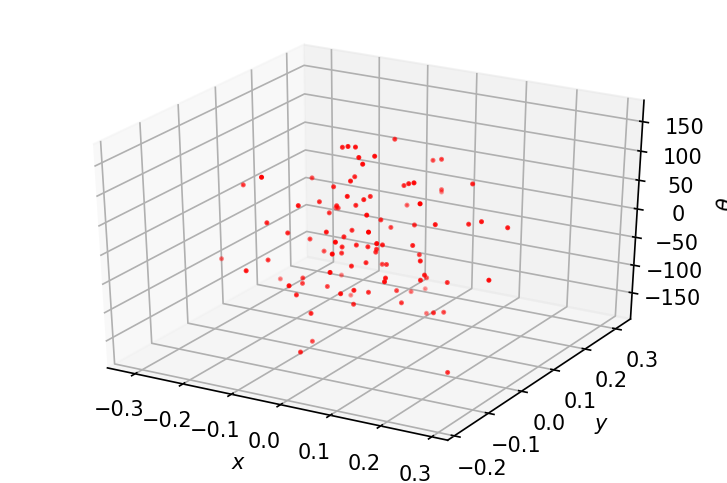

In [177]:
from matplotlib import cm # predefined color map
from mpl_toolkits.mplot3d import Axes3D # use 3D projection in plotting
mpl.rcParams['figure.dpi']=150 

M = 100                                # number of particles
mu = np.array([0,0,0])                 # initial state vector 
R = np.array([[0.01, 0., 0.],          # system noise covariance matrix
              [0., 0.01, 0.],
              [0., 0., 10000]])
t = np.linspace(1, 5, 5)               # time t
particles = np.zeros((len(t)+1, 3, M)) # create a t x 3 x M numpy array to store particles
particles[0] = np.random.multivariate_normal(mu,R,M).T

for particle in range(len(particles[0][2])):
    if particles[0][2][particle] > 180: 
        particles[0][2][particle] -= 180
    elif particles[0][2][particle] < -180:
        particles[0][2][particle] += 180


fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')
ax1.scatter(particles[0][0],particles[0][1],particles[0][2],color='r',s=2)
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y$')
ax1.set_zlabel(r'$\theta$')



### (b) After the robot moves $d=1$ units *forward*, assuming the robot moves flawlessly without any noise, implement the prediction step of the particle filter. Plot the posterior. Compare the resulting posterior with the one you have obtained from the EKF and from your intuitive analysis. What can you learn about the resolution of the x-y coordinates and the orientation $\theta$ in your particle filter? Draw the uncertainty ellipse of the Gaussian approximation of your location posterior. How does it compare against the EKF estimate?

The robot moving *forward* indicates that it moves $1$ unit forward in the direction its facing. Therefore, the predicted state is based on the randomly drawn $\theta$ value. 

Text(0.5, 0, '$\\theta$')

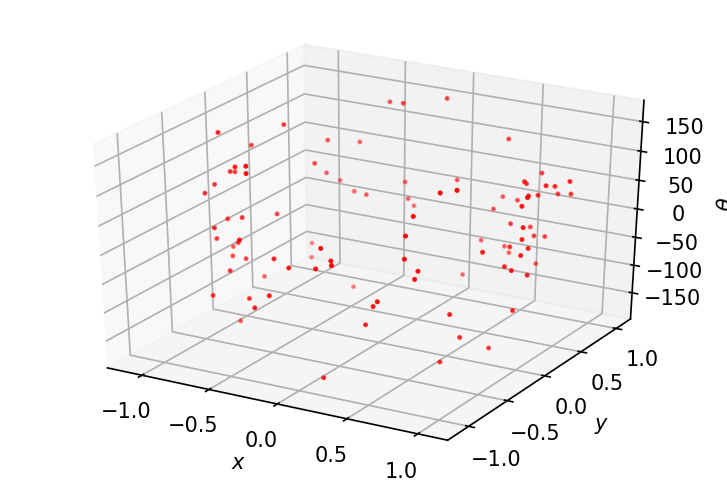

In [193]:
for m in range(M):
    particles[1][0][m] = particles[0][0][m] + np.cos(particles[0][2][m])
    particles[1][1][m] = particles[0][1][m] + np.sin(particles[0][2][m])
    particles[1][2][m] = particles[0][2][m]

    
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')
ax2.scatter(particles[1][0],particles[1][1],particles[1][2],color='r',s=2)
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$y$')
ax2.set_zlabel(r'$\theta$')